In [1]:
pip install unicodecsv

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import needed libraries & float format definition


import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [3]:
# Reading and showing head data
flights = pd.read_csv("Cleaned_train.csv")
flights.head(20)

,DepAirport,ArrAirport,AirlineCode,FlightNo,EDepTime,EArrTime,RDepTime,RArrTime,VehCode,Cancel,...,HTemp,Special_Begin,Special_End,Special_Content,Delay_hours,Delay,TravelDis,Clock,Flight_Time,Temp_diff
0,HGH,DLC,CZ,CZ6328,26/1/16 12:00,26/1/16 14:05,26/1/16 12:58,26/1/16 14:43,1,Normal,...,7,NaN,NaN,NaN,1,0,2,12,Afternoon,6
1,SHA,XMN,FM,FM9261,14/1/16 8:40,14/1/16 10:25,14/1/16 9:10,14/1/16 10:39,2,Normal,...,6,NaN,NaN,NaN,0,0,2,8,Morning,3
2,CAN,WNZ,ZH,ZH9597,26/1/16 9:35,26/1/16 11:25,26/1/16 9:59,26/1/16 11:14,3,Normal,...,11,NaN,NaN,NaN,0,0,2,9,Morning,5
3,SHA,ZUH,9C,9C8819,6/1/16 22:50,7/1/16 1:45,6/1/16 23:04,7/1/16 1:24,4,Normal,...,10,NaN,NaN,NaN,0,0,3,22,Evening,6
4,SHE,TAO,TZ,TZ185,10/1/16 4:10,10/1/16 6:20,10/1/16 4:25,10/1/16 5:39,5,Normal,...,-7,NaN,NaN,NaN,0,0,2,4,Late_Evening,13
5,NKG,HAK,GS,GS6538,17/1/16 3:05,17/1/16 5:55,17/1/16 4:24,17/1/16 7:00,7,Normal,...,9,NaN,NaN,NaN,1,0,3,3,Late_Evening,9
6,LZO,PEK,MU,MU5709,16/1/16 2:10,16/1/16 4:50,16/1/16 2:02,16/1/16 4:17,8,Normal,...,9,NaN,NaN,NaN,-0,0,3,2,Late_Evening,3
7,WEH,HGH,CA,CA1788,25/1/16 7:50,25/1/16 9:45,25/1/16 7:44,25/1/16 9:25,9,Normal,...,-2,NaN,NaN,NaN,-0,0,2,7,Morning,2
8,JHG,LJG,JD,JD5182,27/1/16 6:40,27/1/16 8:05,27/1/16 6:43,27/1/16 7:41,10,Normal,...,NaN,NaN,NaN,NaN,0,0,1,6,Late_Evening,NaN
9,XIY,PEK,CA,CA1204,26/1/16 2:05,26/1/16 4:05,26/1/16 2:06,26/1/16 3:32,11,Normal,...,2,NaN,NaN,NaN,0,0,2,2,Late_Evening,9


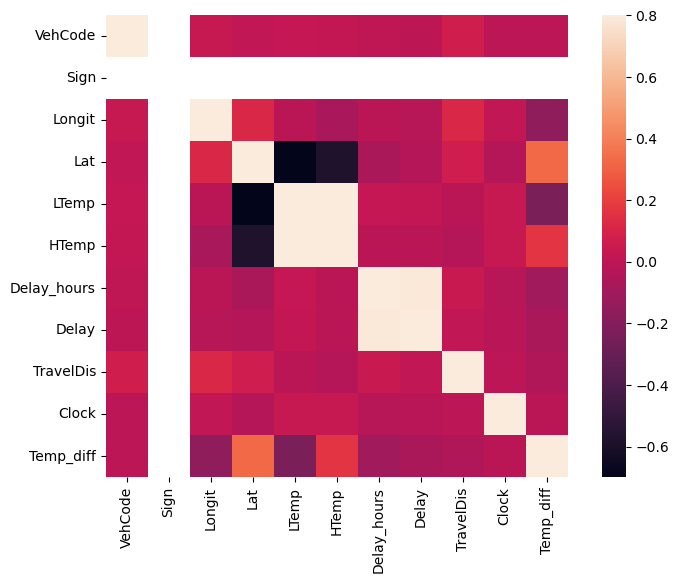

In [4]:
#correlation matrix
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [5]:
# creating new variables and renaming 
#flights['DepDate'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['Delay_hours'] <= 0.25, 'Status'] = 0
    flights.loc[flights['Delay_hours'] >= 0.25, 'Status'] = 1
    flights.loc[flights['Delay_hours'] >= 0.75, 'Status'] = 2
    flights.loc[flights['Cancel'] == 'Cancel', 'Status'] = 3
    
    
#Cancellation cause
#flights.loc[flights["CancellationCode"] =="A", 'CancellationCode'] = "0"
#flights.loc[flights["CancellationCode"] =="B", 'CancellationCode'] = "1"
#flights.loc[flights["CancellationCode"] =="C", 'CancellationCode'] = "2"

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


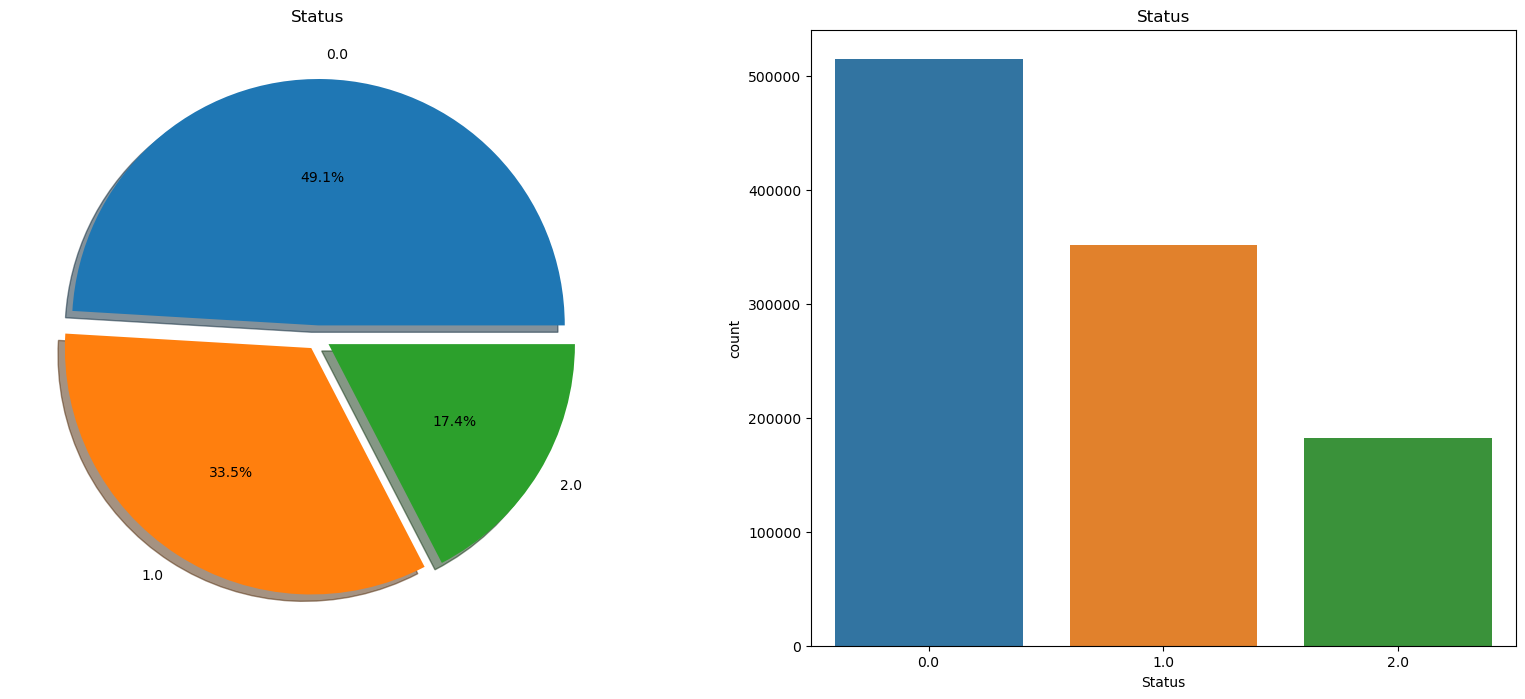

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2)


In [6]:
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2)')

# 1.2.2 Delayed flights

In [7]:
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


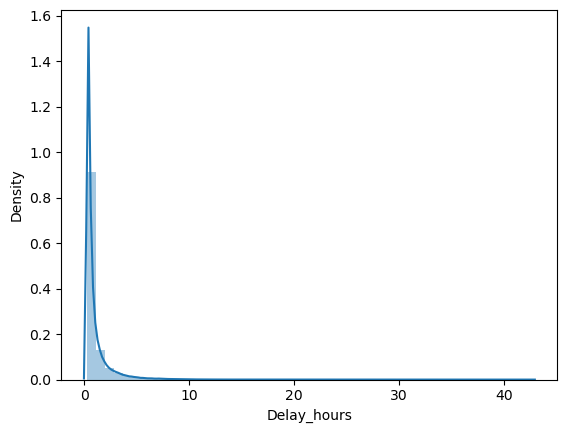

In [8]:
#histogram
sns.distplot(Delayedflights['Delay_hours'])
plt.show()

In [9]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['Delay_hours'].skew())
print("Kurtosis: %f" % Delayedflights['Delay_hours'].kurt())

Skewness: 5.073304
Kurtosis: 51.410966


It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.

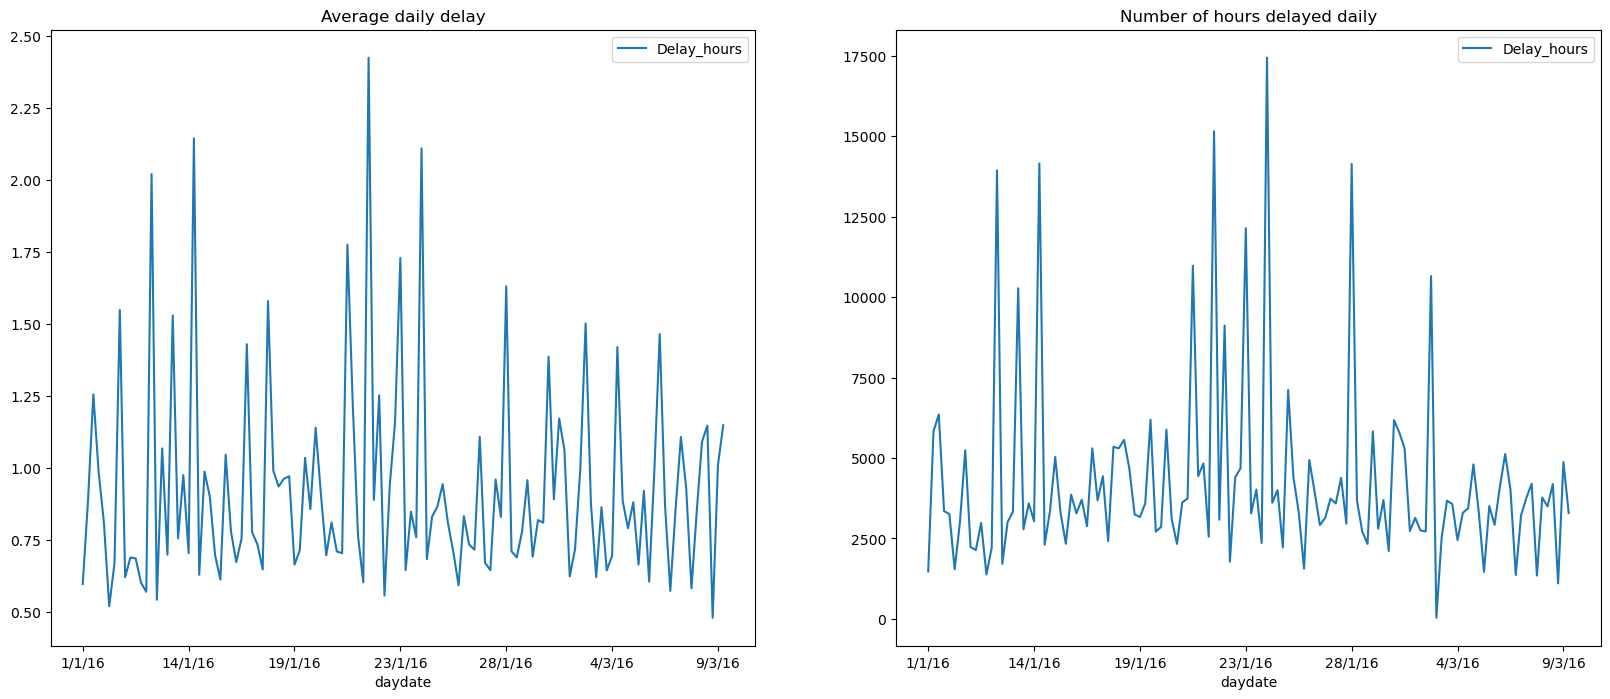

In [10]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['daydate','Delay_hours']].groupby(['daydate']).mean().plot(ax=ax[0])
ax[0].set_title('Average daily delay')
Delayedflights[['daydate','Delay_hours']].groupby(['daydate']).sum().plot(ax=ax[1])
ax[1].set_title('Number of hours delayed daily')
plt.show()

In [ ]:
sns.jointplot(x='RDepTime',y='Delay_hours',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()

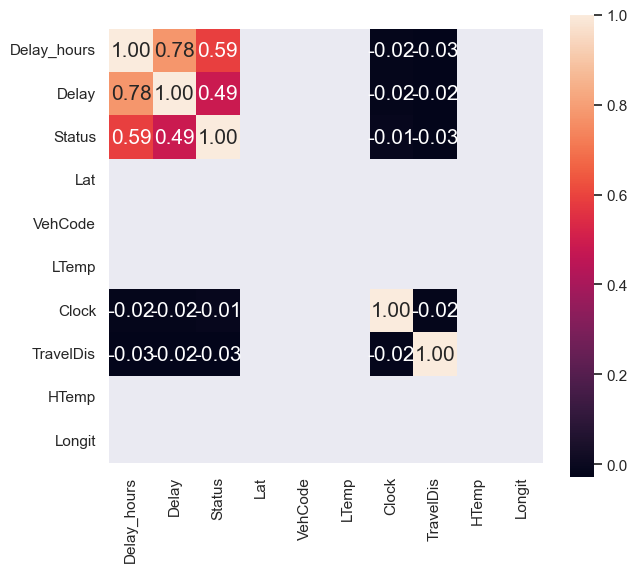

In [20]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(7, 6))
cols = delcorrmat.nlargest(k, 'Delay_hours')['Delay_hours'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 2.2.2 Carrier Delays

In [12]:
print(flights['AirlineCode'].value_counts().head(20))

CZ    184174
MU    174082
CA    109111
HU     67895
ZH     64291
MF     55962
3U     50343
SC     44954
GS     38939
FM     28357
JD     27105
HO     22316
8L     18384
9C     17727
G5     16235
KN     14604
PN     13397
BK     13187
EU     11983
KY      9458
Name: AirlineCode, dtype: int64


/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


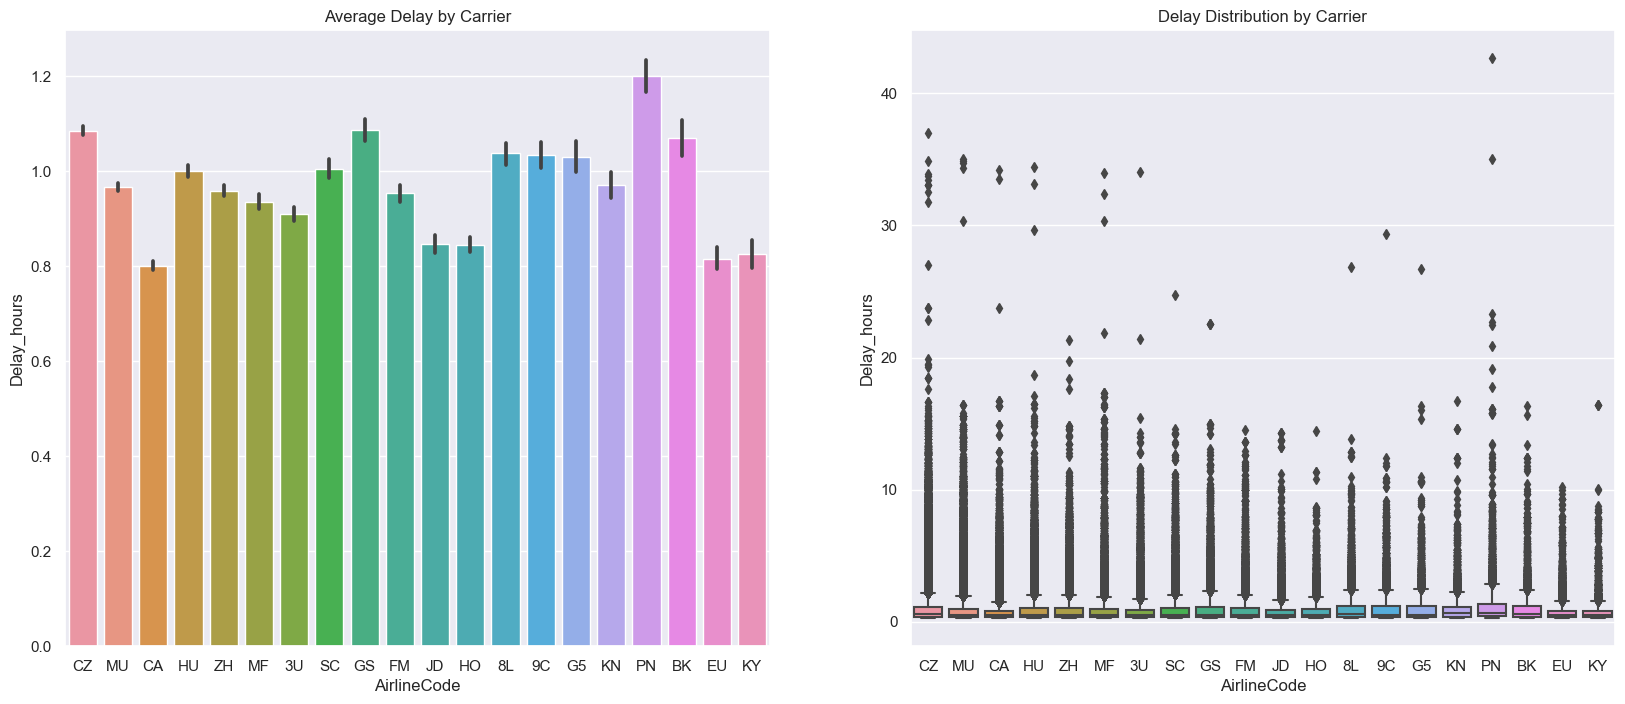

['CZ: China Southern Airlines', 'MU: China Eastern Airlines', 'CA: Air China', 'HU: Hainan Airlines', 'ZH: Shenzhen Airlines', 'MF: Xiamen Airlines', '3U: Sichuan Airlines', 'SC: Shandong Airlines', 'GS: Tianjin Airlines', 'FM: Shanghai Airlines', 'JD: Capital Airlines', 'HO: Juneyao Airlines', '8L: Lucky Air Co.', '9C: Spring Airlines', 'G5: China Express Airlines', 'KN: China United Airlines', 'PN: West Air', 'BK: Okay Airways', 'EU: Euro Airways', 'KY: Kunming Airlines']


In [27]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('AirlineCode','Delay_hours', data=Delayedflights,ax=ax[0], order=['CZ', 'MU', 'CA', 'HU','ZH','MF','3U','SC',
                                                                             'GS','FM', 'JD','HO','8L', '9C','G5','KN',
                                                                             'PN','BK','EU','KY'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('AirlineCode','Delay_hours', data=Delayedflights,ax=ax[1], order=['CZ', 'MU', 'CA', 'HU','ZH','MF','3U','SC',
                                                                             'GS','FM', 'JD','HO','8L', '9C','G5','KN',
                                                                             'PN','BK','EU','KY'])

ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['CZ: China Southern Airlines', 'MU: China Eastern Airlines', 'CA: Air China', 'HU: Hainan Airlines',
       'ZH: Shenzhen Airlines','MF: Xiamen Airlines','3U: Sichuan Airlines','SC: Shandong Airlines','GS: Tianjin Airlines',
       'FM: Shanghai Airlines', 'JD: Capital Airlines','HO: Juneyao Airlines','8L: Lucky Air Co.', 
       '9C: Spring Airlines','G5: China Express Airlines','KN: China United Airlines','PN: West Air','BK: Okay Airways',
       'EU: Euro Airways','KY: Kunming Airlines'])


# Top 20 Airports Delay

In [16]:
#Having more than 300 airports on the dataset, we are going to focus on the top20. 
Top20airports = Delayedflights[(Delayedflights.DepAirport == 'HGH') | (Delayedflights.DepAirport == 'XMN') |
                               (Delayedflights.DepAirport == 'SHA') | (Delayedflights.DepAirport == 'KRY') |
                               (Delayedflights.DepAirport == 'CAN') | (Delayedflights.DepAirport == 'HLD') | 
                               (Delayedflights.DepAirport == 'SHE') | (Delayedflights.DepAirport == 'DLC') |
                               (Delayedflights.DepAirport == 'LZO') | (Delayedflights.DepAirport == 'PEK') | 
                               (Delayedflights.DepAirport == 'WEH') | (Delayedflights.DepAirport == 'HAK') |
                               (Delayedflights.DepAirport == 'JHG') | (Delayedflights.DepAirport == 'LJG') | 
                               (Delayedflights.DepAirport == 'XIY') | (Delayedflights.DepAirport == 'CSX') |
                               (Delayedflights.DepAirport == 'KMG') | (Delayedflights.DepAirport == 'PVG') | 
                               (Delayedflights.DepAirport == 'TAO') | (Delayedflights.DepAirport == 'ZUH')]

print(Top20airports['DepAirport'].value_counts())

CAN    45235
PEK    43635
KMG    33388
PVG    30653
SHA    23544
HGH    20029
XIY    16630
XMN    15242
CSX    11956
HAK    11838
TAO     8701
DLC     5615
ZUH     4715
SHE     4595
LJG     2661
JHG     2124
WEH      470
LZO      441
HLD      354
KRY      125
Name: DepAirport, dtype: int64


/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


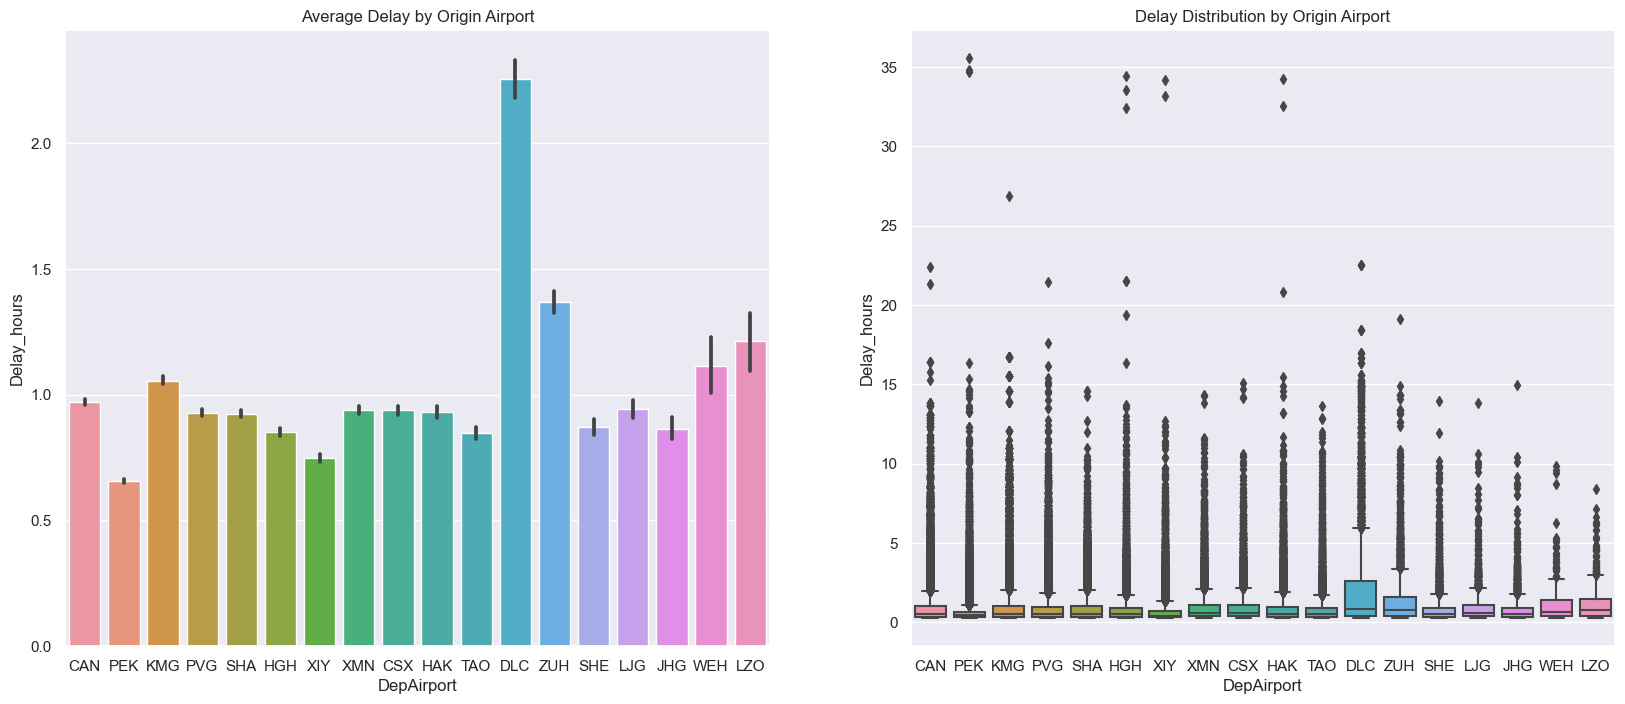

['CAN: Guangzhou', 'PEK: Beijing', 'KMG: Kunming', 'PVG: Shanghai Pudong', 'SHA: Shanghai Hongqiao', 'HGH: Hangzhou', 'XIY: Xi an', 'XMN: Xiamen', 'HAK: Haikou', 'TAO: Qingdao', 'DLC: DaLian', 'ZUH: Zhuhai', 'SHE: Shenyang', 'LJG: Lijiang', 'JHG: Xishuangbanna', 'WEH: Weihai', 'LZO: Luzhou']


In [26]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('DepAirport','Delay_hours', data=Top20airports,ax=ax[0], order=['CAN', 'PEK', 'KMG', 'PVG','SHA','HGH','XIY','XMN','CSX',
                                                                     'HAK', 'TAO','DLC','ZUH', 'SHE','LJG','JHG','WEH','LZO'])
ax[0].set_title('Average Delay by Origin Airport')
sns.boxplot('DepAirport','Delay_hours', data=Top20airports,ax=ax[1], order=['CAN', 'PEK', 'KMG', 'PVG','SHA','HGH','XIY','XMN','CSX',
                                                                     'HAK', 'TAO','DLC','ZUH', 'SHE','LJG','JHG','WEH','LZO'])

ax[1].set_title('Delay Distribution by Origin Airport')
plt.close(2)
plt.show()

print(['CAN: Guangzhou', 'PEK: Beijing', 'KMG: Kunming', 'PVG: Shanghai Pudong','SHA: Shanghai Hongqiao','HGH: Hangzhou',
       'XIY: Xi an','XMN: Xiamen','HAK: Haikou','TAO: Qingdao','DLC: DaLian','ZUH: Zhuhai','SHE: Shenyang',
       'LJG: Lijiang','JHG: Xishuangbanna','WEH: Weihai','LZO: Luzhou'])

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)

# Create a density plot
plt.hist(DepAirport, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()


NameError: name 'DepAirport' is not defined

/Users/cherncheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


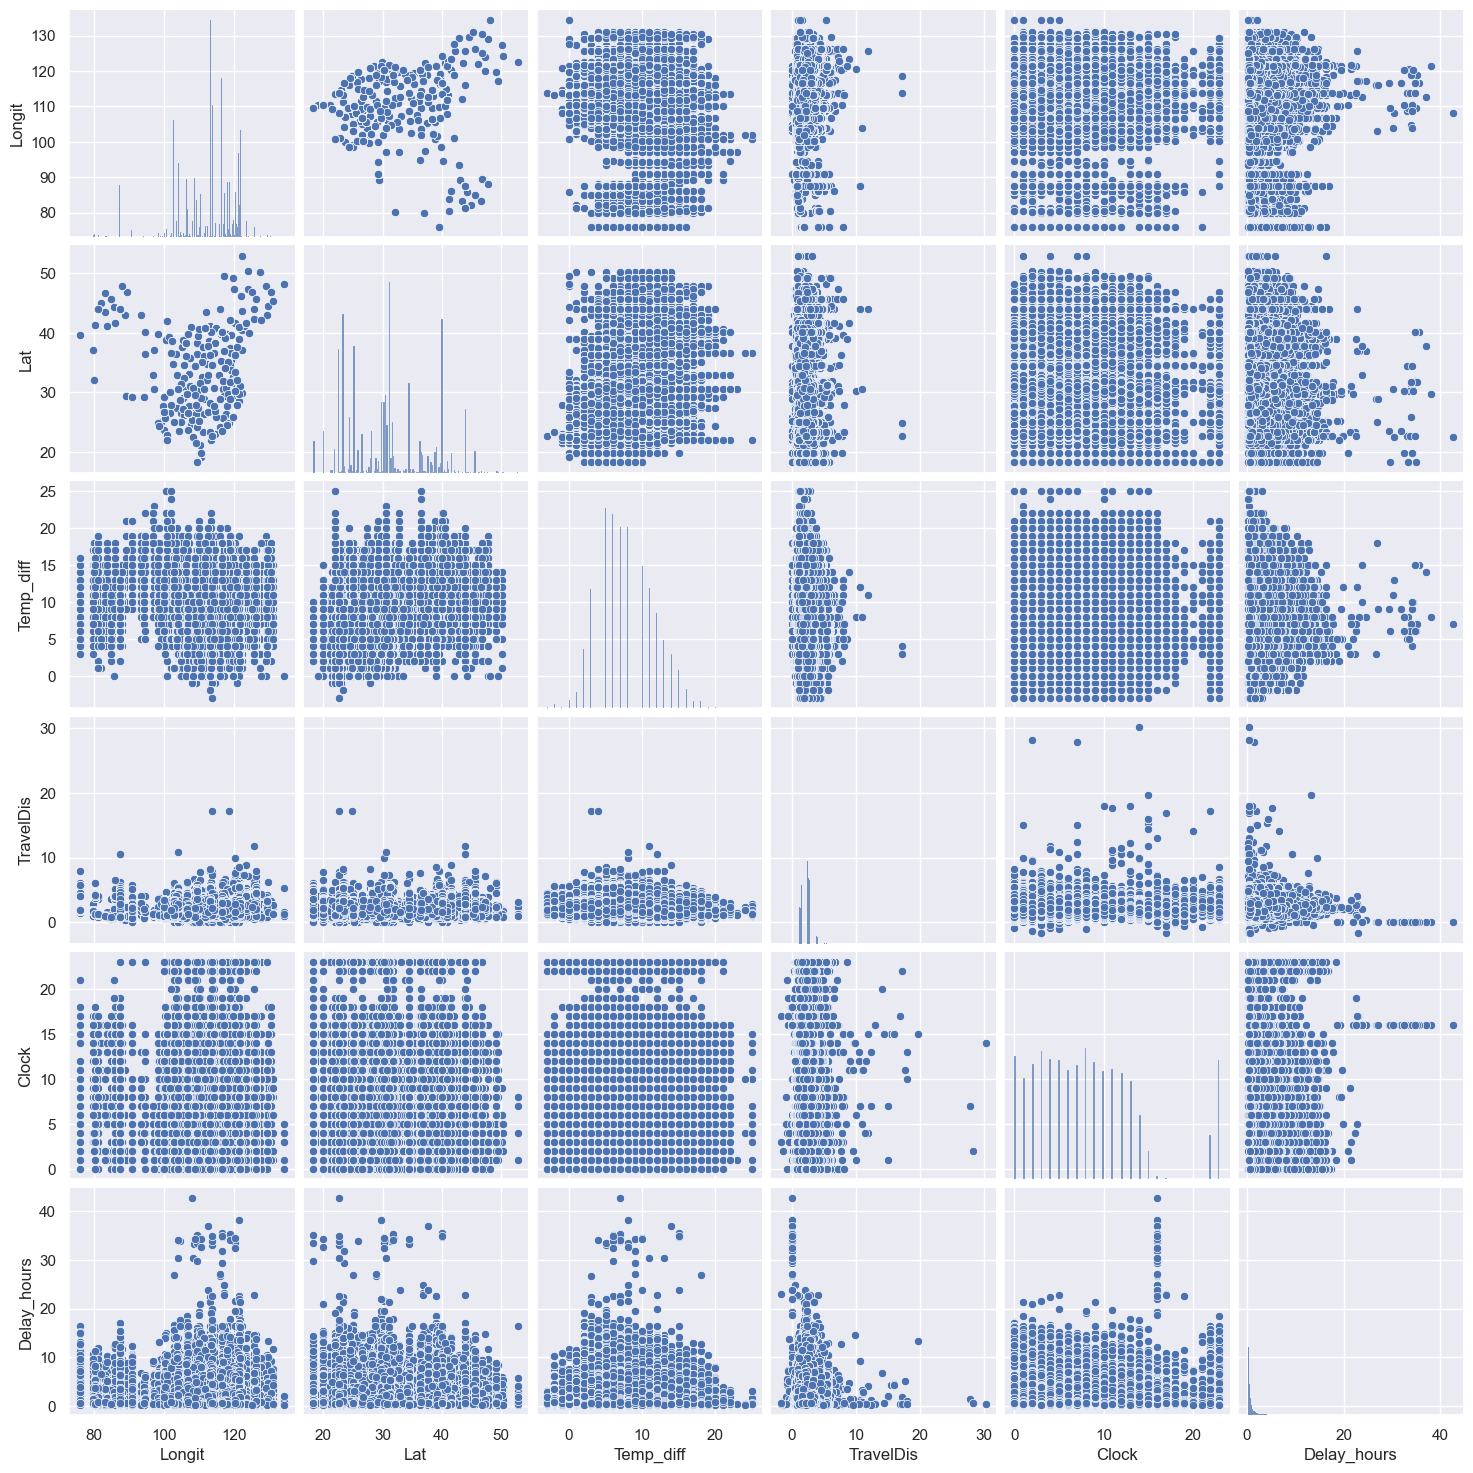

In [19]:
#scatterplot
sns.set()
cols = ['Longit', 'Lat', 'Temp_diff', 'TravelDis', 'Clock', 'Delay_hours']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()